## Week 10

### Name         : Ayachit Madhukar  
### Course       : DSC550 
### Instructor  : Brett Werner
### Date           : 9 Aug 2021

## About Project 

#### This project is continuiation learning from Week - 4 (Sentiment Analysis). Objective of the project is to further deep dive into sentiment analysis and text data mining to come up with a evaluation model 

## Business Problem

####  This project is an attempt to perform mining on customer's opinion about a product to have a better understanding of what the  customer feels about the product. Project sets basic foundation for business owner to take action to improve your services based on having a better visibility on customer feedback

#### This project presents sentiment analysis of customer reviews to help future business decisions 



## Why Sentiment Analysis

####  Sentiment analysis is like having a private detective listening to what your customers are saying—everywhere.

#### Sure, your customers might give some feedback to your customer service team directly. But they are also going to give their honest opinion on other platforms such as Facebook, discussion forums, Amazon, Twitter… the list really is endless.



## Data Source & Referenes
#### Current project referes a kaggle dataset 

https://www.kaggle.com/kfrawee/sentimental-analysis
#### I also refered few other article for other aspects of the projects like :

https://www.kaggle.com/tanulsingh077/twitter-sentiment-extaction-analysis-eda-and-model/notebook?select=submission.csv

https://www.analyticsvidhya.com/blog/2015/09/build-predictive-model-10-minutes-python/

https://www.wonderflow.ai/blog/sentiment-analysis-examples


## Key Libraries
    1. NTLK : Primarily for tokenization
    2. WordCloud : To highlight key sentimental data points in review text
    3. STOPWORDS : To exclude english stopwords
    4. Matplotlib : Primarily for plotting / visulaization
    5. numpy : General use like array or NAN handling
    6. pandas : primarily dataframe operations starting with loading review file.
    7. sklearn : most useful library contains a lot of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction
    8. keras :  a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models
   


## Next Step
### Dataset requires further clean up and feature selection based on project objective
### Will be performing model evaluation  

## Constraints
### Current Implementation  is limited to a signle data source available in Kaggle. This is mostly cleaner dataset with  limited features.

## Scope of Improvement
### Scope can be scaled by  referrring multiple social media sources, direct feeds and may be by introducing  NLP to the project. 

## Project Code for initial analysis and graphs

In [1]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
from wordcloud import WordCloud, STOPWORDS

In [2]:
# using  review file from kaggle dataset

datafile='Data/Review_data.csv'
reviewdf = pd.read_csv(datafile)
reviewdf.head()

/Users/madhukarayachit/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [3]:
reviewdf.columns

Index(['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
       'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username'],
      dtype='object')

In [4]:
#rename columns
new_columns=['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
       'reviews_date', 'reviews_dateAdded', 'reviews_dateSeen',
       'reviews_didPurchase', 'reviews_doRecommend', 'reviews_id',
       'reviews_numHelpful', 'reviews_rating', 'reviews_sourceURLs',
       'reviews_text', 'reviews_title', 'reviews_userCity',
       'reviews_userProvince', 'reviews_username']
reviewdf.columns=new_columns

In [5]:
# created function to handle relatively very long category text

## test case 
#  str='Electronics,iPad & Tablets,All Tablets,Fire Ta...'
#  str[:str.find(",")]

# Function definition
def ShortCategory(x):
    try:
        x = x[:x.find(",")]
    except:
        pass
    return x

# applied function on entire df
reviewdf['Short_Category']=reviewdf['categories'].apply(ShortCategory)

In [6]:
# ensuring review from 1 - 5 rating and  eliminating NAN as well

store_df_filtered = reviewdf[reviewdf['reviews_rating'].isin([1, 2,3,4,5])]
print(store_df_filtered)

                         id  \
0      AVqkIhwDv8e3D1O-lebb   
1      AVqkIhwDv8e3D1O-lebb   
2      AVqkIhwDv8e3D1O-lebb   
3      AVqkIhwDv8e3D1O-lebb   
4      AVqkIhwDv8e3D1O-lebb   
...                     ...   
34655  AVpfiBlyLJeJML43-4Tp   
34656  AVpfiBlyLJeJML43-4Tp   
34657  AVpfiBlyLJeJML43-4Tp   
34658  AVpfiBlyLJeJML43-4Tp   
34659  AVpfiBlyLJeJML43-4Tp   

                                                    name       asins   brand  \
0      All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...  B01AHB9CN2  Amazon   
1      All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...  B01AHB9CN2  Amazon   
2      All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...  B01AHB9CN2  Amazon   
3      All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...  B01AHB9CN2  Amazon   
4      All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...  B01AHB9CN2  Amazon   
...                                                  ...         ...     ...   
34655                                                NaN  B006GWO5W

In [7]:
# Review breakup
store_df_filtered.groupby(['reviews_rating'])['reviews_rating'].count()


reviews_rating
1.0      410
2.0      402
3.0     1499
4.0     8541
5.0    23775
Name: reviews_rating, dtype: int64

In [8]:
# extracting 5 top review counts  by category 
data=store_df_filtered.groupby(['Short_Category'] ,sort=True)['reviews_rating'].count()
data=data.sort_values(ascending=False)

<AxesSubplot:title={'center':'Grouped Bar Graph with Review Rating'}, xlabel='Short_Category'>

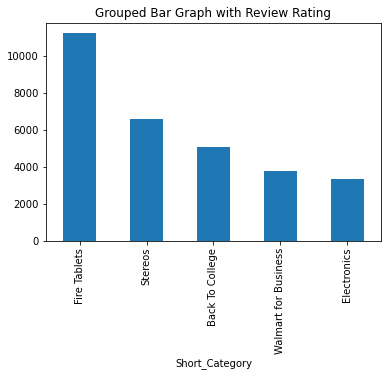

In [9]:
# plot grouped bar chart
data.head(5).plot(x='Review',
        kind='bar',
        stacked=False,
        title='Grouped Bar Graph with Review Rating')

In [10]:
# assign reviews with score > 3 as positive sentiment
# score < 3 negative sentiment
# remove score = 3
store_df_filtered = store_df_filtered[store_df_filtered['reviews_rating'] != 3]
store_df_filtered['sentiment'] = store_df_filtered['reviews_rating'].apply(lambda rating : +1 if rating > 3 else -1)


In [11]:
# removing NAN values from DF
store_df_filtered = store_df_filtered.replace(np.nan, '', regex=True)

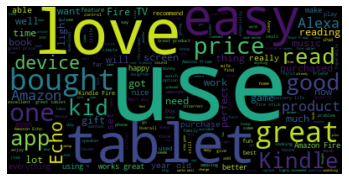

In [12]:
# generating a word cloud 

stopwords = set(STOPWORDS)
textt = " ".join(review for review in store_df_filtered.reviews_text)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [13]:
# split df - positive and negative sentiment:
positive = store_df_filtered[store_df_filtered['sentiment'] == 1]
negative = store_df_filtered[store_df_filtered['sentiment'] == -1]

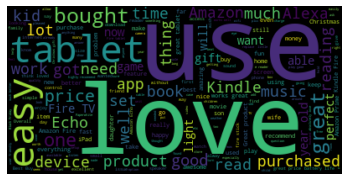

In [14]:
# generating a word cloud for positive sentiment


#stopwords.update(["br", "href","good","better","worth"]) 

## "good","better","worth removed because they were included in negative sentiment

pos = " ".join(review for review in positive.reviews_text)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

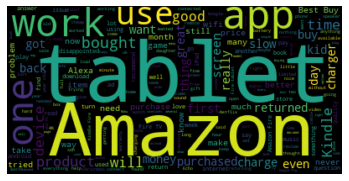

In [15]:
# generating a word cloud for negative sentiment

neg = " ".join(review for review in negative.reviews_text)
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.show()

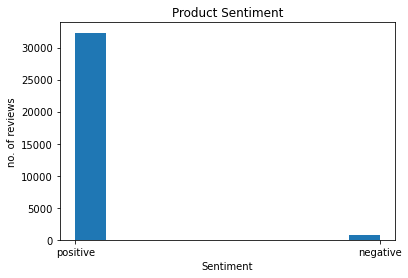

In [16]:
# Finaly, we can take a look at the distribution of reviews with sentiment across the dataset:

store_df_filtered['sentiment'] = store_df_filtered['sentiment'].replace({-1 : 'negative'})
store_df_filtered['sentiment'] = store_df_filtered['sentiment'].replace({1 : 'positive'})


fig,ax = plt.subplots(1,1)
ax.hist(store_df_filtered['sentiment'])
ax.set_title("Product Sentiment")
ax.set_xlabel('Sentiment')
ax.set_ylabel('no. of reviews')
plt.show()

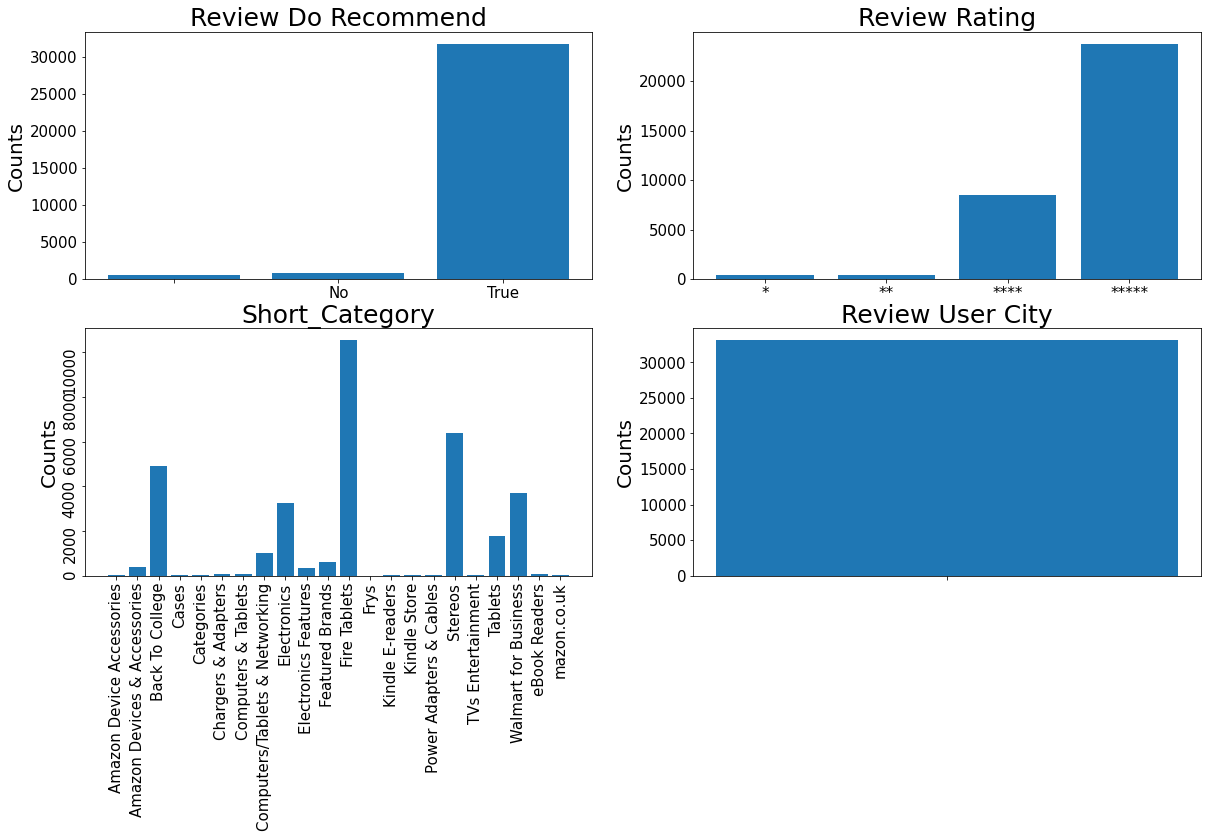

In [17]:
data=store_df_filtered
#%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# make the data read to feed into the visulizer
X_Survived = data.replace({'reviews_doRecommend': {1: 'True', 0: 'No'}}).groupby('reviews_doRecommend').size().reset_index(name='Counts')['reviews_doRecommend']
Y_Survived = data.replace({'reviews_doRecommend': {1: 'True', 0: 'No'}}).groupby('reviews_doRecommend').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0, 0].bar(X_Survived, Y_Survived)
axes[0, 0].set_title('Review Do Recommend', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_Pclass = data.replace({'reviews_rating': {1: '*', 2: '**', 3: '***' , 4 :'****' ,5 : '*****'}}).groupby('reviews_rating').size().reset_index(name='Counts')['reviews_rating']
Y_Pclass = data.replace({'reviews_rating': {1: '*', 2: '**', 3: '***' , 4 :'****' ,5 : '*****'}}).groupby('reviews_rating').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0, 1].bar(X_Pclass, Y_Pclass)
axes[0, 1].set_title('Review Rating', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)





# make the data read to feed into the visulizer
X_Sex = data.groupby('Short_Category').size().reset_index(name='Counts')['Short_Category']
Y_Sex = data.groupby('Short_Category').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1, 0].bar(X_Sex, Y_Sex)
axes[1, 0].set_title('Short_Category', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15,rotation=90)


# make the data read to feed into the visulizer
X_Embarked = data.groupby('reviews_userCity').size().reset_index(name='Counts')['reviews_userCity']
Y_Embarked = data.groupby('reviews_userCity').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1, 1].bar(X_Embarked, Y_Embarked)
axes[1, 1].set_title('Review User City', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)

plt.show()




## Milestone 2

In Milestone 2, you should drop any features that are not useful for your model building. You should explain and justify why the feature dropped is not useful. You should address any missing data issues. Build any new features that you need for your model, e.g., create dummy variables for categorical features if necessary. Explain your process at each step. You can use any methods/tools you think are most appropriate. Again, keep in mind that this may look very different from what is done in the Titanic tutorial case study. You should do what makes sense for your project. Be careful to avoid data snooping in these steps.

### 1. Remove unused features

Objective is to perform sentiment analysis based on **rating & review comments** by customer. Hence, droping rest of the columns.

In [94]:
# creating a fresh dataset for milestone 2
datafile='Data/Review_data.csv'
reviewdf = pd.read_csv(datafile)



/Users/madhukarayachit/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [95]:
reviewdf

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34655,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-09-18T00:00:00Z,NaN,2015-08-29T00:00:00Z,...,NaN,NaN,NaN,3.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,This is not appreciably faster than any other ...,Not appreciably faster than any other 1.8A cha...,NaN,NaN,Kris
34656,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-11-21T00:00:00Z,NaN,2015-09-02T00:00:00Z,...,NaN,NaN,NaN,1.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,Amazon should include this charger with the Ki...,Should be included,NaN,NaN,Jonathan Stewart
34657,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-10-19T00:00:00Z,NaN,2015-09-04T00:00:00Z,...,NaN,NaN,NaN,1.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,Love my Kindle Fire but I am really disappoint...,Disappointing Charger,NaN,NaN,J Lawson
34658,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Ser

In [96]:
# removeing unused features and renaming it
data=reviewdf[['reviews.text','reviews.rating']]
data.columns=['reviews_text','reviews_rating']

In [97]:
# observing revised dataset
data.info

<bound method DataFrame.info of                                             reviews_text  reviews_rating
0      This product so far has not disappointed. My c...             5.0
1      great for beginner or experienced person. Boug...             5.0
2      Inexpensive tablet for him to use and learn on...             5.0
3      I've had my Fire HD 8 two weeks now and I love...             4.0
4      I bought this for my grand daughter when she c...             5.0
...                                                  ...             ...
34655  This is not appreciably faster than any other ...             3.0
34656  Amazon should include this charger with the Ki...             1.0
34657  Love my Kindle Fire but I am really disappoint...             1.0
34658  I was surprised to find it did not come with a...             1.0
34659  to spite the fact that i have nothing but good...             1.0

[34660 rows x 2 columns]>

### 2. Handle Missing Data 

In [98]:
# looking for missing or NAN data and replacing it with a dummy value
data["reviews_text"].fillna("no review", inplace = True) 
data["reviews_rating"].fillna(0, inplace = True) 

/Users/madhukarayachit/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [99]:
# found 1 bad record
data[data['reviews_text']=='no review']

,reviews_text,reviews_rating
3111,no review,5.0


In [100]:
# dropping 1 bad row from the record
data=data.drop(3111)

In [101]:
# rating data is good
data[data['reviews_rating']==0]

,reviews_text,reviews_rating
2886,The Kindle is my first e-ink reader. I own an ...,0.0
2887,"I'm a first-time Kindle owner, so I have nothi...",0.0
2888,UPDATE NOVEMBER 2011:My review is now over a y...,0.0
2889,"I'm a first-time Kindle owner, so I have nothi...",0.0
2890,I woke up to a nice surprise this morning: a n...,0.0
2891,The Kindle is my first e-ink reader. I own an ...,0.0
2892,UPDATE NOVEMBER 2011:br /br /My review is now ...,0.0
2893,I woke up to a nice surprise this morning: a n...,0.0
2894,I use to hate to read but now that I have my K...,0.0
2895,All of them quit working. There's absolutely n...,0.0


### 3. Add new feature

Adding two more feature to flag polarity of sentiment. **Sentiment Score** will be used as positive and negative number. **Sentiment** will indicate plarity in words i.e. **positive** or **negative**

In [102]:
# Adding a new feature for 
data['sentiment_score'] = data['reviews_rating'].apply(lambda rating : +1 if rating > 3 else -1)


In [103]:
# Adding a new feature for sentiment polarity
sentiment = {-1: 'NEGATIVE',
             1: 'POSITIVE'}

data['sentiment'] = data['sentiment_score'].map(sentiment)

In [104]:
data.head

<bound method NDFrame.head of                                             reviews_text  reviews_rating  \
0      This product so far has not disappointed. My c...             5.0   
1      great for beginner or experienced person. Boug...             5.0   
2      Inexpensive tablet for him to use and learn on...             5.0   
3      I've had my Fire HD 8 two weeks now and I love...             4.0   
4      I bought this for my grand daughter when she c...             5.0   
...                                                  ...             ...   
34655  This is not appreciably faster than any other ...             3.0   
34656  Amazon should include this charger with the Ki...             1.0   
34657  Love my Kindle Fire but I am really disappoint...             1.0   
34658  I was surprised to find it did not come with a...             1.0   
34659  to spite the fact that i have nothing but good...             1.0   

       sentiment_score sentiment  
0                    1

### 4. Data cleaning

### Applied all the text handling techniques to clean text review like : Punctuation & stopword /Lemmatization /Stemming

In [105]:
import re
import string

def clean_text(text:str):
    """ Return cleaned text:
            - lowercase
            - remove whitespaces
            - remove HTML tags
            - replace digit with spaces
            - replace punctuations with spaces
            - remove extra spaces and tabs
        ------
        input: text (str)    
        output: cleaned text (str)
    """
    #text = str(text)
    
    text = text.lower()
    text = text.strip()
    
    text = re.sub(' \d+', ' ', text)
    text = re.compile('<.*?>').sub('', text)
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub('\s+', ' ', text)
    
    text = text.strip()
    
    return text

In [106]:
# testing clean_text function
text = "   This is a message to be cleaned. It may involve some things like: <br>, ?, :, ''  26 adjacent spaces and tabs     .  "
print(text, '\n')
clean_text(text)

   This is a message to be cleaned. It may involve some things like: <br>, ?, :, ''  26 adjacent spaces and tabs     .   



'this is a message to be cleaned it may involve some things like adjacent spaces and tabs'

In [107]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
def remove_stopwords(text:str):
    """ Remove stopwords from text:
        ------
        input: text (str)    
        output: cleaned text (str)
    """
    #text = str(text)
    filtered_sentence = []

    # getting all english stopwords 
    stop_words = set(stopwords.words('english'))
    stop_words
    
    # Stop word lists can be adjusted for your problem
    ##stop_words = ["a", "an", "the", "this", "that", "is", "it", "to", "and"]

    # Tokenize the sentence
    words = word_tokenize(text)
    for w in words:
        if w not in stop_words:
            filtered_sentence.append(w)
    text = " ".join(filtered_sentence)
    
    return text

In [108]:
# testing remove_stopwords function
text = "   This is a message to be cleaned. It may involve some things like: <br>, ?, :, ''  26 adjacent spaces and tabs     .  "
print(text, '\n')
text = clean_text(text)
text =remove_stopwords(text)
print(text, '\n')

   This is a message to be cleaned. It may involve some things like: <br>, ?, :, ''  26 adjacent spaces and tabs     .   

message cleaned may involve things like adjacent spaces tabs 



In [109]:
from nltk.stem import SnowballStemmer
def stemm_text(text:str):
    """ Stemm text:
    ------
    input: text (str)    
    output: Stemmed text (str)
    """
    #text = str(text)
    # Initialize the stemmer
    snow = SnowballStemmer('english')

    stemmed_sentence = []
    # Tokenize the sentence
    words = word_tokenize(text)
    for w in words:
        # Stem the word/token
        stemmed_sentence.append(snow.stem(w))
    text = " ".join(stemmed_sentence)
    
    return text

In [110]:
# testing stemm_text function
text = "   This is a message to be cleaned. It may involve some things like: <br>, ?, :, ''  26 adjacent spaces and tabs     .  "
print(text, '\n')
text = clean_text(text)
text = remove_stopwords(text)
text=stemm_text(text)
print(text, '\n')

   This is a message to be cleaned. It may involve some things like: <br>, ?, :, ''  26 adjacent spaces and tabs     .   

messag clean may involv thing like adjac space tab 



In [111]:
# This is a helper function to map NTLK position tags
# Full list is available here: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
from nltk.corpus import wordnet

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [112]:
from nltk.stem import WordNetLemmatizer
def lemmatize(text:str):
    """ lemmatize text:
    ------
    input: text (str)    
    output: lemmatized text (str)
    """
    #text = str(text)
    
    # Initialize the lemmatizer
    wl = WordNetLemmatizer()

    lemmatized_sentence = []

    # Tokenize the sentence
    words = word_tokenize(text)
    # Get position tags
    word_pos_tags = nltk.pos_tag(words)
    # Map the position tag and lemmatize the word/token
    for idx, tag in enumerate(word_pos_tags):
        lemmatized_sentence.append(wl.lemmatize(tag[0], get_wordnet_pos(tag[1])))

    lemmatized_text = " ".join(lemmatized_sentence)
    
    return lemmatized_text

In [113]:
import nltk
#nltk.download('wordnet')

In [114]:
# testing 
text = "   This is a message to be cleaned. It may involve some things like: <br>, ?, :, ''  26 adjacent spaces and tabs     .  "
print(text, '\n')
text = clean_text(text)
text = remove_stopwords(text)
text=stemm_text(text)
text=lemmatize(text)
print(text, '\n')

   This is a message to be cleaned. It may involve some things like: <br>, ?, :, ''  26 adjacent spaces and tabs     .   

messag clean may involv thing like adjac space tab 



In [115]:
# clean text
data['clean_reviews_text'] = data['reviews_text'].apply(clean_text)
# remove stopwords
data['clean_reviews_text'] = data['clean_reviews_text'].apply(remove_stopwords)
# lemmatize
data['clean_reviews_text'] = data['clean_reviews_text'].apply(lemmatize)

In [116]:
data.head

<bound method NDFrame.head of                                             reviews_text  reviews_rating  \
0      This product so far has not disappointed. My c...             5.0   
1      great for beginner or experienced person. Boug...             5.0   
2      Inexpensive tablet for him to use and learn on...             5.0   
3      I've had my Fire HD 8 two weeks now and I love...             4.0   
4      I bought this for my grand daughter when she c...             5.0   
...                                                  ...             ...   
34655  This is not appreciably faster than any other ...             3.0   
34656  Amazon should include this charger with the Ki...             1.0   
34657  Love my Kindle Fire but I am really disappoint...             1.0   
34658  I was surprised to find it did not come with a...             1.0   
34659  to spite the fact that i have nothing but good...             1.0   

       sentiment_score sentiment  \
0                    

### 4. Analyzing clean data through visualization

#### Presenting ditribution of rating across the dataset through Bar & Pie 

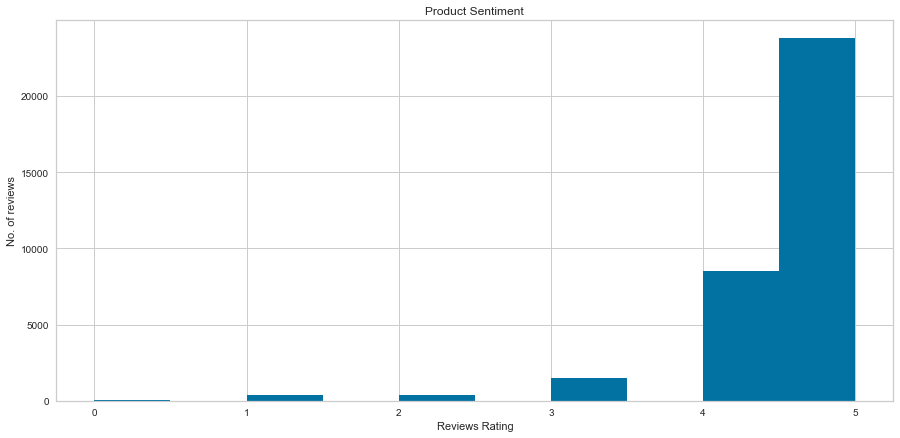

In [117]:
# visual analysis of rating distribution


fig,ax = plt.subplots(1,1)
ax.hist(data['reviews_rating'])
ax.set_title("Product Sentiment")
ax.set_xlabel('Reviews Rating')
ax.set_ylabel('No. of reviews')
plt.show()


#### Presenting distribution of sentiments across the dataset

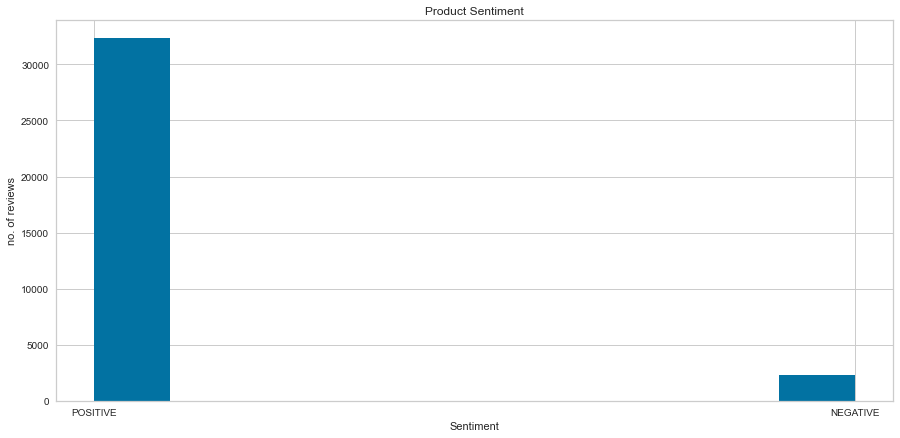

In [118]:
# Finaly, we can take a look at the distribution of reviews with sentiment across the dataset:


fig,ax = plt.subplots(1,1)
ax.hist(data['sentiment'])
ax.set_title("Product Sentiment")
ax.set_xlabel('Sentiment')
ax.set_ylabel('no. of reviews')
plt.show()

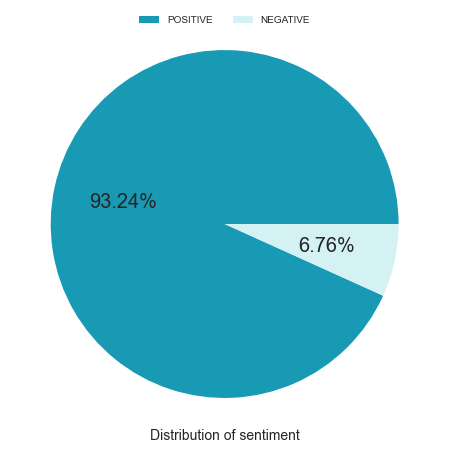

In [119]:
# distribution of sentiment
plt.figure(figsize = (8, 8))

labels = ['POSITIVE', 'NEGATIVE']
colors = ['#189AB4', '#D4F1F4']
plt.pie(data['sentiment'].value_counts(), autopct='%0.2f%%',colors=colors)

plt.title('Distribution of sentiment', size=14, y=-0.01)
plt.legend(labels, ncol=2, loc=9)
plt.show()

#### Presenting cloudword plot for entire review text

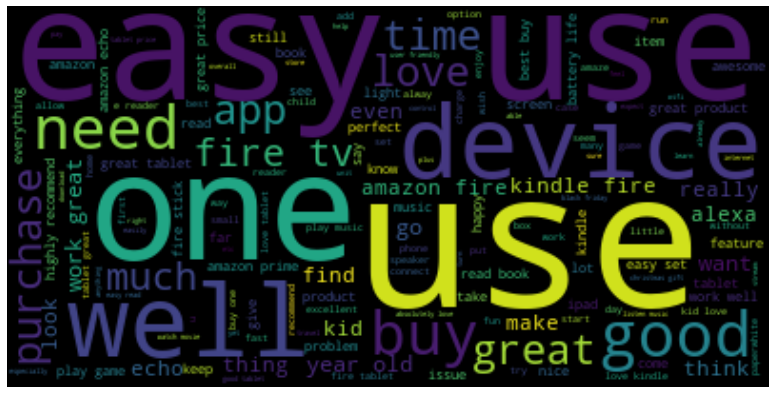

In [120]:
# generating a word cloud 

stopwords = set(STOPWORDS)
textt = " ".join(review for review in data.clean_reviews_text)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Presenting cloudword plot for positive  reviews

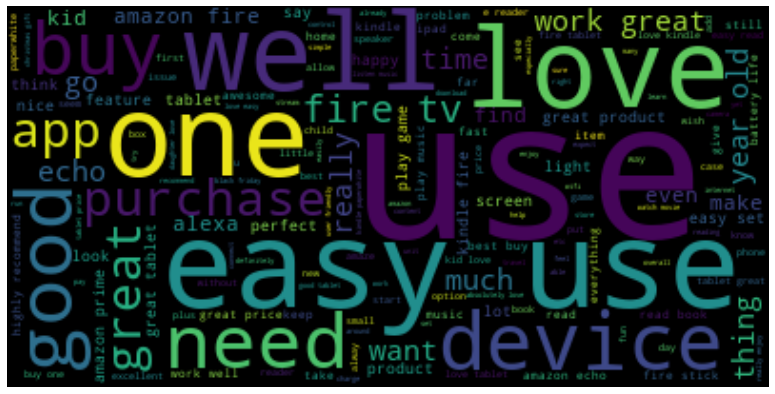

In [121]:
# split df - positive and negative sentiment:
positive = data[data['sentiment_score'] == 1]
negative = data[data['sentiment_score'] == -1]

# generating a word cloud for positive sentiment


#stopwords.update(["br", "href","good","better","worth"]) 

## "good","better","worth removed because they were included in negative sentiment

pos = " ".join(review for review in positive.clean_reviews_text)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Presenting cloudword plot for negative  reviews

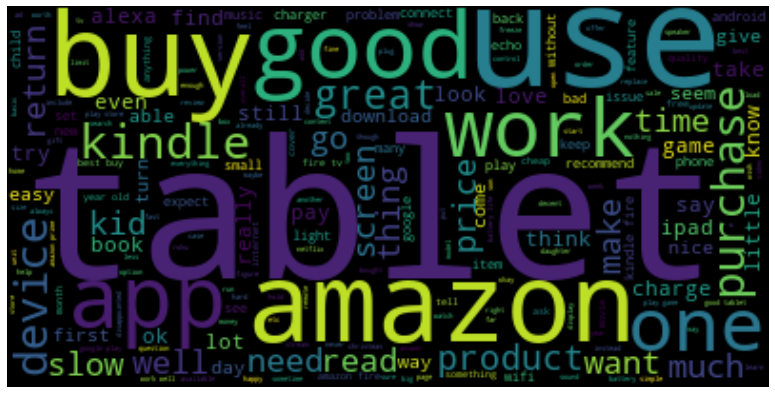

In [122]:
# generating a word cloud for negative sentiment

neg = " ".join(review for review in negative.clean_reviews_text)
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.show()

### Determining polarity with SentimentIntensityAnalyzer

#### Imroving approach instead of relying on rating alone,  SIA beig used to dtermine sentiment plarity 

In [123]:
# testing 
reviews = negative.clean_reviews_text
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()


def is_positive(review: str) -> bool:
    """True if tweet has positive compound sentiment, False otherwise."""
    return sia.polarity_scores(review)["compound"] > 0

data['Polarity'] = data['clean_reviews_text'].apply(is_positive)


#### Did not find neutral sentiment

In [124]:
data.groupby('Polarity').count()

,reviews_text,reviews_rating,sentiment_score,sentiment,clean_reviews_text
Polarity,,,,,
False,2739,2739,2739,2739,2739
True,31920,31920,31920,31920,31920


In [125]:
# casting polarity to sentiment score for futre use
variable_name = {True : 1 , False : -1 }
data['sentiment_score'] = data['Polarity'].map(variable_name)

In [126]:
data.head

<bound method NDFrame.head of                                             reviews_text  reviews_rating  \
0      This product so far has not disappointed. My c...             5.0   
1      great for beginner or experienced person. Boug...             5.0   
2      Inexpensive tablet for him to use and learn on...             5.0   
3      I've had my Fire HD 8 two weeks now and I love...             4.0   
4      I bought this for my grand daughter when she c...             5.0   
...                                                  ...             ...   
34655  This is not appreciably faster than any other ...             3.0   
34656  Amazon should include this charger with the Ki...             1.0   
34657  Love my Kindle Fire but I am really disappoint...             1.0   
34658  I was surprised to find it did not come with a...             1.0   
34659  to spite the fact that i have nothing but good...             1.0   

       sentiment_score sentiment  \
0                    

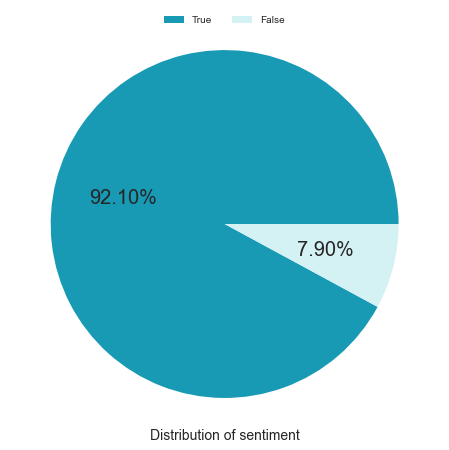

In [127]:
# distribution of sentiment
plt.figure(figsize = (8, 8))

labels = ['True', 'False']
colors = ['#189AB4', '#D4F1F4']
plt.pie(data['Polarity'].value_counts(), autopct='%0.2f%%',colors=colors)

plt.title('Distribution of sentiment', size=14, y=-0.01)
plt.legend(labels, ncol=2, loc=9)
plt.show()

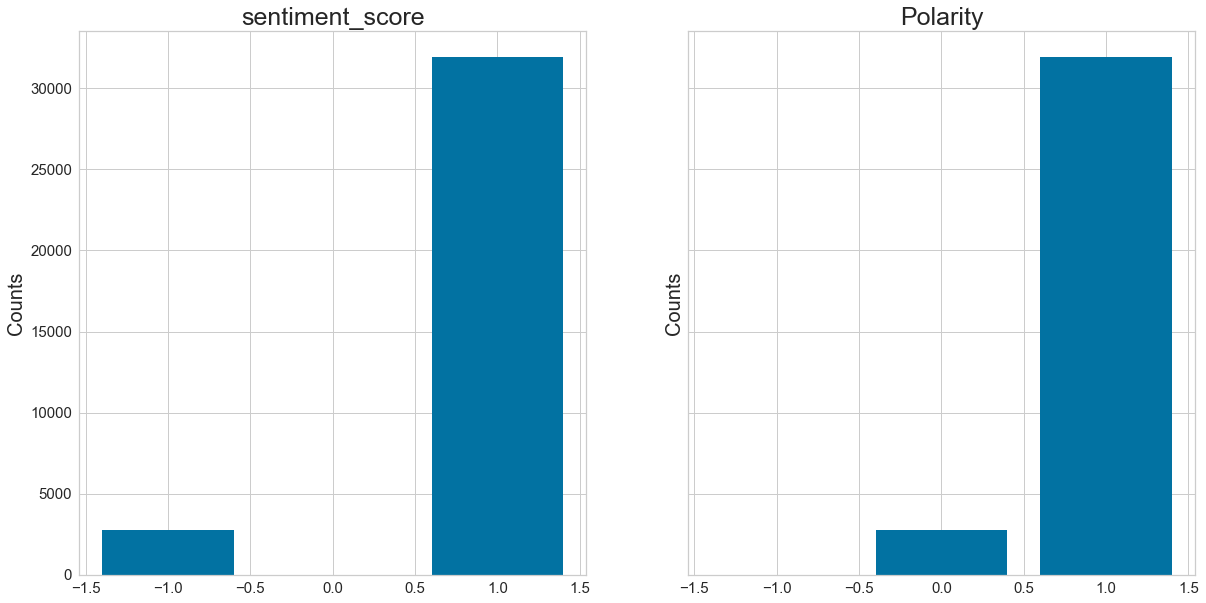

In [128]:

# Plotting sentiment score and polarity 
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
#fig, axes = plt.subplots(nrows =2, ncols = 2)

fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True)
#ax1.plot(range(10), 'r')
#ax2.plot(range(10), 'b')


# make the data read to feed into the visulizer
# make the data read to feed into the visulizer
X_Sex = data.groupby('sentiment_score').size().reset_index(name='Counts')['sentiment_score']
Y_Sex = data.groupby('sentiment_score').size().reset_index(name='Counts')['Counts']
# make the bar plot
ax1.bar(X_Sex, Y_Sex)
ax1.set_title('sentiment_score', fontsize=25)
ax1.set_ylabel('Counts', fontsize=20)
ax1.tick_params(axis='both', labelsize=15)


# make the data read to feed into the visulizer
X_Sex = data.groupby('Polarity').size().reset_index(name='Counts')['Polarity']
Y_Sex = data.groupby('Polarity').size().reset_index(name='Counts')['Counts']
# make the bar plot
ax2.bar(X_Sex, Y_Sex)
ax2.set_title('Polarity', fontsize=25)
ax2.set_ylabel('Counts', fontsize=20)
ax2.tick_params(axis='both', labelsize=15)


plt.show()


In [129]:
data.groupby('sentiment_score').size().reset_index(name='Counts')

,sentiment_score,Counts
0,-1,2739
1,1,31920


## Milestone 3 & 4

Build and evaluate at least one model. You can use any methods/tools you think are most appropriate, but you should explain/justify why you are choosing the model(s) and evaluation metric(s) you choose. 

It is important to think about what type of model and metric makes sense for the context of your problem. If you are familiar with hyperparameter tuning, this would also be a great addition to your project. Again, keep in mind that this may look very different from what is done in the Titanic tutorial case study. 

You should do what makes sense for your project. Write a short overview/conclusion of the insights gained from your model building/evaluation.


In [130]:
data.columns

Index(['reviews_text', 'reviews_rating', 'sentiment_score', 'sentiment',
       'clean_reviews_text', 'Polarity'],
      dtype='object')

In [131]:
# Original data is taking time due to its volume  , have to resize it to improve the performance 
data=data.sample(n=5000,random_state=1)

#### Vectorizing review  data using  Tfidf

In [132]:
# Vectorizing review  text 

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, 
                        min_df=5, 
                        norm='l2', 
                        encoding='latin-1', 
                        ngram_range=(1, 2), 
                        stop_words='english')
X = tfidf.fit_transform(data.clean_reviews_text).toarray()
y = data.sentiment_score


In [133]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Moved test size from 25% to 65 % and now 50% for best result


In [143]:
# Preparing training & testing data 

from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size =0.65, random_state=8)
    

# .25 , .65 .50

In [73]:
#pip install imbalanced-learn

     |████████████████████████████████| 206 kB 2.7 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


###  Feedback

Madhukar, this is looking pretty good. But be careful about using accuracy as your driving metric. Accuracy isn't a very helpful metric when your classes are so imbalanced. It looks like all of your models are struggling a bit due to this imbalanced issue. You might want to look at some methods to mitigate this.

Also, there is something wrong with the "Training and validation accuracy" graph you created. It is clearly not representing accuracy.

###  Imblearn techniques are the methods by which we can generate a data set that has an equal ratio of classes.

In [144]:
#Imblearn techniques are the methods by which we can generate a data set that has an equal ratio of classes.
import imblearn
print(imblearn.__version__)
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

0.8.0


In [145]:
print(X.shape)
print(y.shape)

(9214, 2683)
(9214,)


###  Model selection , Evaluating and predicting models

Assessing the predictive performance of the models and and to judge how they perform outside the sample to a new data/ test data


In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection  import cross_val_score

models = []
def classification_Models(xtrain,xtest, ytrain, ytest ):
    

    
    models.append( ('LR',  LogisticRegression()) )
    models.append( ('CART',DecisionTreeClassifier()) )
    models.append( ('KNN', KNeighborsClassifier()) )
    models.append( ('NB',  GaussianNB()) )
    #models.append( ('LDA',  LinearDiscriminantAnalysis()) )
    models.append( ('SVM',  SVC()) )

    modeloutcomes = []
    modelnames = []
    for name,model in models:
        v_results = cross_val_score(model, xtrain, ytrain, cv = 3, 
                                     scoring='accuracy', n_jobs = -1, verbose = 0)
        print(name,v_results.mean())
        modeloutcomes.append(v_results)
        modelnames.append(name)
        
    print(modeloutcomes)
  
        
classification_Models(X_train,X_test, y_train, y_test)

LR 0.9190452268560622
CART 0.9308322145713337
KNN 0.5102354452672758
NB 0.934243067284512
SVM 0.964329825473128
[array([0.9255814 , 0.91069767, 0.92085661]), array([0.92930233, 0.92930233, 0.93389199]), array([0.51069767, 0.51069767, 0.50931099]), array([0.93395349, 0.93488372, 0.93389199]), array([0.95627907, 0.97302326, 0.96368715])]


## SVM came out as winner 

In [147]:
# Classification report, Confusion matric and Accuracy 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Evaluating and predicting models

for name,model in models:
    trainedmodel = model.fit(X_train,y_train)
    
    # prediction
    ypredict = trainedmodel.predict(X_test)
    
    acc = accuracy_score(y_test,ypredict)
    classreport = classification_report(y_test,ypredict)
    confMat = confusion_matrix(y_test,ypredict)
    
    print('\n****************************'+name)
    print('The accuracy: {}'.format(acc))
    print('The Classification Report:\n {}'.format(classreport))
    print('The Confusion Matrix:\n {}'.format(confMat))
    
    
    


****************************LR
The accuracy: 0.9307178631051753
The Classification Report:
               precision    recall  f1-score   support

          -1       0.88      0.99      0.93      2973
           1       0.99      0.87      0.93      3017

    accuracy                           0.93      5990
   macro avg       0.94      0.93      0.93      5990
weighted avg       0.94      0.93      0.93      5990

The Confusion Matrix:
 [[2941   32]
 [ 383 2634]]

****************************CART
The accuracy: 0.9409015025041736
The Classification Report:
               precision    recall  f1-score   support

          -1       0.92      0.96      0.94      2973
           1       0.96      0.92      0.94      3017

    accuracy                           0.94      5990
   macro avg       0.94      0.94      0.94      5990
weighted avg       0.94      0.94      0.94      5990

The Confusion Matrix:
 [[2853  120]
 [ 234 2783]]

****************************KNN
The accuracy: 0.499165275

Text(0.5, 1.0, 'Confusion Matrix')

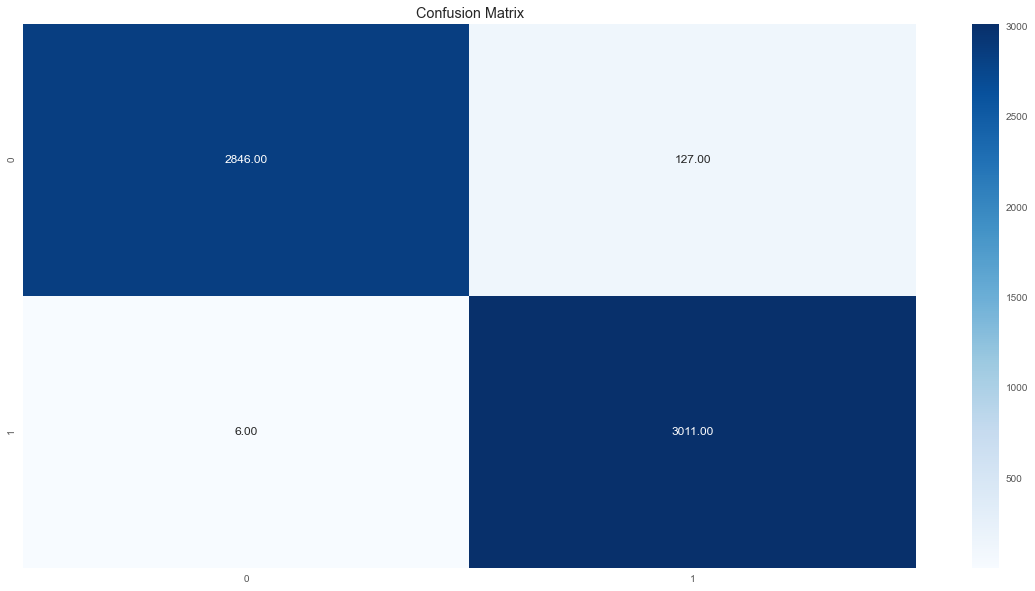

In [148]:
import seaborn as sns
model=SVC()
trainedmodel = model.fit(X_train,y_train)
    
# prediction
ypredict = trainedmodel.predict(X_test)
    
confMat = confusion_matrix(y_test,ypredict)
sns.heatmap(confMat, annot=True,annot_kws={"fontsize":12}, fmt='.2f', cmap='Blues').set_title('Confusion Matrix') 

## Keras Modeling 

Based on feedback changed loss to **binary_crossentropy** from **categorical_crossentropy** as we have only two classes. Initial thought was to expect neutral sentiment also but since dataset doesn't show any neutral label , i have decided to go for 'binary' insterad of 'categorical'
There was issue with accuracy , hence kept verbose =true to observe the output with Epoch=10 for quick turnaround. 

In [149]:
from keras.models import Sequential
from keras import layers

input_dim =X_train.shape[1]

model = Sequential()
model.add(layers.Dense(100, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()



history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=True,
                    validation_data=(X_test, y_test) ,
                    batch_size=10)

loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               268400    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 269,421
Trainable params: 269,421
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
323/323 [==============================] - 2s 3ms/step - loss: -0.7302 - accuracy: 0.0386 - val_loss: -16.2616 - val_accuracy: 0.1721
Epoch 2/10
323/323 [==============================] - 1s 2ms/step - loss: -38.0212 - accuracy: 0.1791 - val_loss: -134.7533 - val_accuracy: 0.1354
Epoch 3/10
323/323 [==============================] - 1s 2ms/step - loss: -218.3364 - 

In [150]:
# preparing plot 
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

###  Improvement in the graph after changing test size and applying imalance correction using imblearn

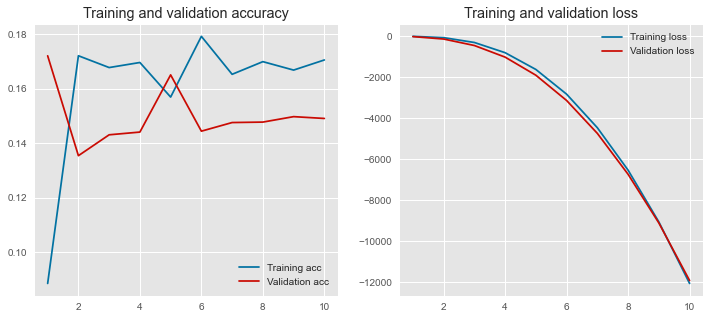

In [151]:
# plotting history for visulaization
plot_history(history)

In [152]:
from keras.backend import clear_session
clear_session()

## Tuning  Hyperparameters

In [153]:
#https://medium.com/@vasista/sentiment-analysis-using-svm-338d418e3ff1

import time
from sklearn import svm
from sklearn.metrics import classification_report
# Perform classification with SVM, kernel=linear

classifier_linear = svm.SVC(kernel='linear')
t0 = time.time()
classifier_linear.fit(X_train, y_train)
t1 = time.time()
prediction_linear = classifier_linear.predict(X_test)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1
# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
report = classification_report(y_test, prediction_linear, output_dict=True)



Training time: 6.397962s; Prediction time: 9.685251s


In [154]:
print('positive: ', report['1'])
print('negative: ', report['-1'])


positive:  {'precision': 0.9912631962140517, 'recall': 0.9025522041763341, 'f1-score': 0.9448299791811242, 'support': 3017}
negative:  {'precision': 0.9093432007400555, 'recall': 0.9919273461150353, 'f1-score': 0.9488416988416988, 'support': 2973}


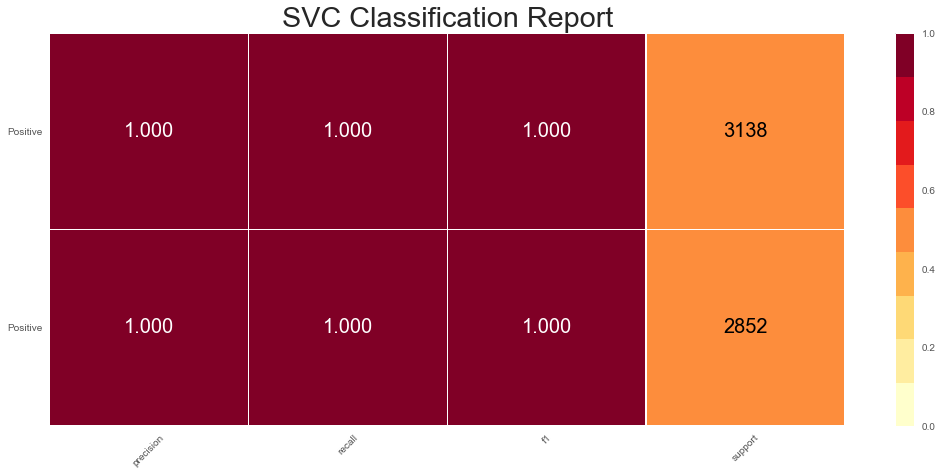

In [167]:
classes = ['Negative','Positive']
from yellowbrick.classifier import ClassificationReport
from sklearn.naive_bayes import GaussianNB
# Precision, Recall, and F1 Score
# set the size of the figure and the font size 
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

visualizer = ClassificationReport(trainedmodel, classes=classes, support=True)



visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, ypredict)  # Evaluate the model on the test data
g = visualizer.poof()

In [176]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,ypredict)

array([[2846,  127],
       [   6, 3011]])

In [174]:
print(ypredict)
print('ytest')
print(y_test)


[ 1  1  1 ... -1  1  1]
ytest
439     1
4628    1
193     1
1428    1
7690   -1
       ..
8146   -1
3193    1
7003   -1
2966    1
2769    1
Name: sentiment_score, Length: 5990, dtype: int64


In [159]:
# SVM Hyperparameter Tuning using GridSearchCV
from sklearn import svm
#imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

    
grid = GridSearchCV(classifier_linear,param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

print(grid.best_estimator_)

grid_predictions = grid.predict(X_test)

print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   8.6s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   8.3s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   8.4s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   8.3s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   8.4s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=  10.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   9.9s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   9.9s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   9.9s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   9.9s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   9.1s
[CV] END .....................C=0.1, gamma=1, k

[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   9.9s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=30.3min
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=  11.0s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=16.5min
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=  11.3s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=  11.9s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=  11.6s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=  11.3s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=  11.2s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   9.9s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   9.9s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   9.9s
[CV] END ...................

[CV] END ......................C=100, gamma=0.1, kernel=poly; total time=   9.7s
[CV] END ......................C=100, gamma=0.1, kernel=poly; total time=   9.8s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   3.4s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   3.4s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   3.4s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   3.3s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   3.4s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   4.3s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   4.4s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   4.4s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   4.3s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   4.3s
[CV] END ...................

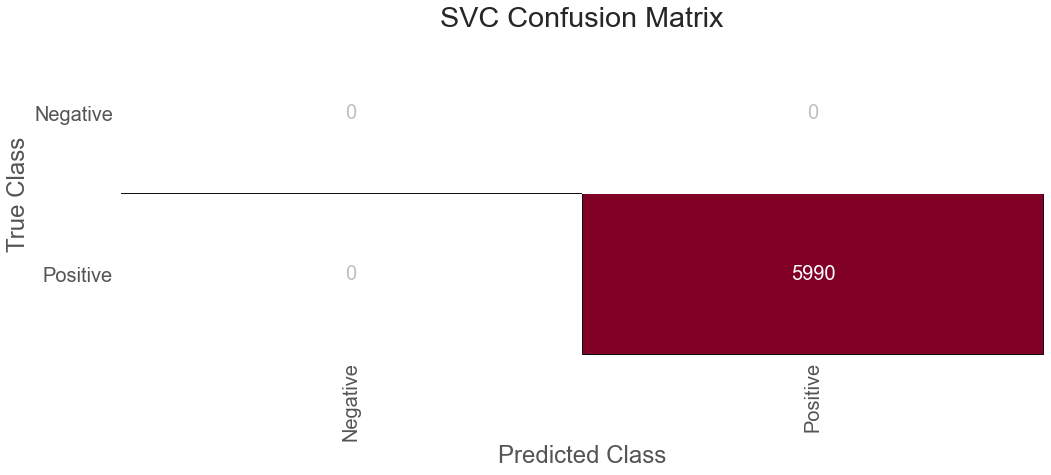

<AxesSubplot:title={'center':'SVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [162]:
from yellowbrick.classifier import ConfusionMatrix
# Instantiate the classification model 
#log_model = LogisticRegression(C=1.0, penalty='l2', solver='liblinear')
log_model =SVC(C=10, gamma=1)
#The ConfusionMatrix visualizer taxes a model
classes = ['Negative','Positive']
cm = ConfusionMatrix(log_model, classes=classes, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_test, y_test)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

#How did we do?
cm.poof()

Text(0.5, 1.0, 'Confusion Matrix')

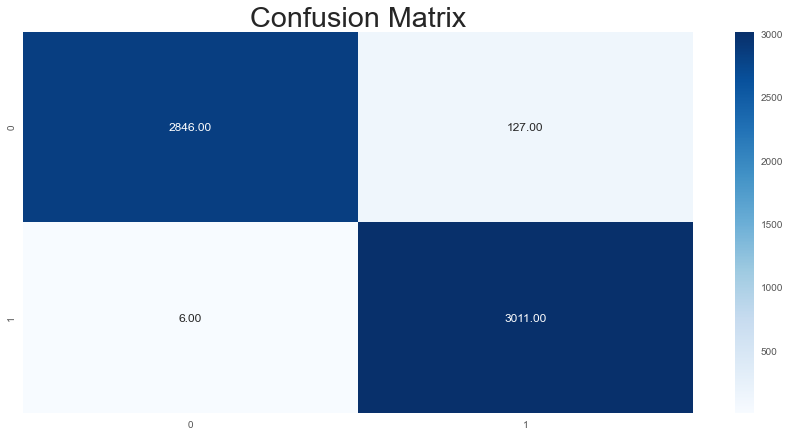

In [177]:
import seaborn as sns

    
confMat = confusion_matrix(y_test,ypredict)
sns.heatmap(confMat, annot=True,annot_kws={"fontsize":12}, fmt='.2f', cmap='Blues').set_title('Confusion Matrix') 

## Improvements in Approach

1. Revisited sentiment score using **SentimentAnalyzer** instead of assigning polarity based on rating which was 1 for anything  greater 3 and -1 for less than or eqauls to 3, **felt previous approach was not considering sentiment score hidden in review phrases.**

2. Considering all the reggression models and evaluation being done to select best fit model which is SVM though initial impression was to go for Logical Reggression 

3. addressing class imbalances using Imblearn techniques 

4. increased test data sample for better results and improve the validation accuracy

## Challenges

1. Every iteration was taking significant time to test 
2. Had challenege with distribution of the classes
3. Meaningful utilization of Keras in the context of the model

## Conclusion

The dependent variable for my dataset is 'Polarity'. The variable contains True and False to determine polarity of the review sentiment. Based on accuracy output of all the models , I decided to use SVM regression for this variable though initial pln was to go for logistic regression  as variable being binary. However , SVM came with best accuracy in classifaction report in terms of accuracy. Further reading also suggest SVM is better choice for text / image analysis. 

The purpose of the study to extract polarity of the sentiment from revire text whethet it is poitive or negative to convey sentiment of customer to product owner.

The data-set we trained here has accuracy is 94%.I conducted hyperparameter tuning  Based on the Accuracy indicated  in model evaludation  I would recommend SVM Regressionfor this data set.

This case study attempts to provide a working model for any text based sentiment analysis especially use cases like "product review" , "twitter review" , "movie review" to know the general perception/opinion  of the peoplw/customer/audiances  whether they are liking it or rejecting it. Based on the accuracy of the model, the students have a very high chance of predicting which university they can be admitted to for their credentials. There is an opportunity to improve model performance and determine best model by increasing the size of the data set by collecting more data. 